In [139]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix as CM
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

import xgboost as xgb
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

Source = https://www.kaggle.com/datasets/ehabashraf/credit-train

In [2]:
path = "C:/Users/fabia/Documents/problema clasificacion desbalanceo de clases/credit_train.csv"
df = pd.read_csv(path)

In [3]:
df.dropna(axis = 0, how = 'any', subset = ['Loan ID','Customer ID'], inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,"100,000.00","80,846.00","80,846.00","100,000.00","100,000.00","46,859.00","100,000.00","100,000.00","100,000.00","99,998.00","99,796.00","99,990.00"
mean,"11,760,447.39","1,076.46","1,378,276.56","18,472.41",18.20,34.90,11.13,0.17,"294,637.38","760,798.38",0.12,0.03
std,"31,783,942.55","1,475.40","1,081,360.20","12,174.99",7.02,22.00,5.01,0.48,"376,170.93","8,384,503.47",0.35,0.26
min,"10,802.00",585.00,"76,627.00",0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"179,652.00",705.00,"848,844.00","10,214.16",13.50,16.00,8.00,0.00,"112,670.00","273,438.00",0.00,0.00
50%,"312,246.00",724.00,"1,174,162.00","16,220.30",16.90,32.00,10.00,0.00,"209,817.00","467,874.00",0.00,0.00
75%,"524,942.00",741.00,"1,650,663.00","24,012.06",21.70,51.00,14.00,0.00,"367,958.75","782,958.00",0.00,0.00
max,"99,999,999.00","7,510.00","165,557,393.00","435,843.28",70.50,176.00,76.00,15.00,"32,878,968.00","1,539,737,892.00",7.00,15.00


In [6]:
(
    df.select_dtypes('object')
    .drop(['Loan ID','Customer ID'], axis = 1)
    .head(10)
)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation
5,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation
6,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation
7,Charged Off,Long Term,< 1 year,Home Mortgage,Buy House
8,Fully Paid,Short Term,2 years,Rent,Debt Consolidation
9,Fully Paid,Short Term,< 1 year,Rent,Debt Consolidation


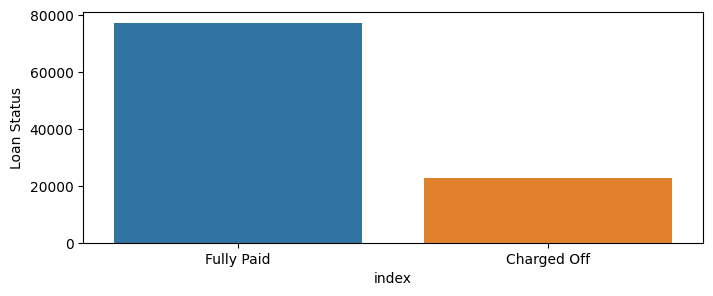

In [7]:
plt.subplots(figsize = (8,3))
bar_y = pd.DataFrame(df['Loan Status'].value_counts()).reset_index()
sns.barplot(data = bar_y, x = 'index', y = 'Loan Status')
plt.show()

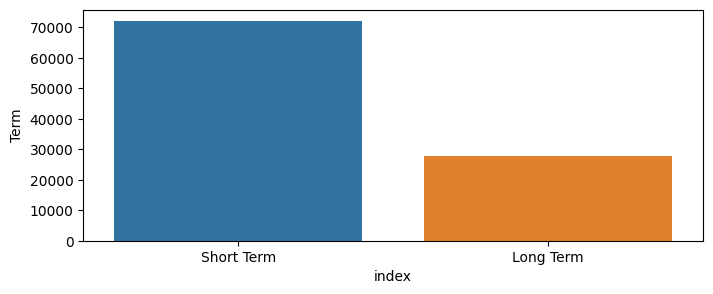

In [8]:
plt.subplots(figsize = (8,3))
bar_y = pd.DataFrame(df['Term'].value_counts()).reset_index()
sns.barplot(data = bar_y, x = 'index', y = 'Term')
plt.show()

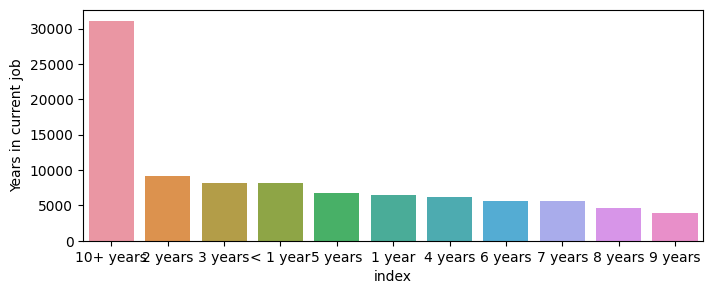

In [9]:
plt.subplots(figsize = (8,3))
bar_y = pd.DataFrame(df['Years in current job'].value_counts()).reset_index()
sns.barplot(data = bar_y, x = 'index', y = 'Years in current job')
plt.show()

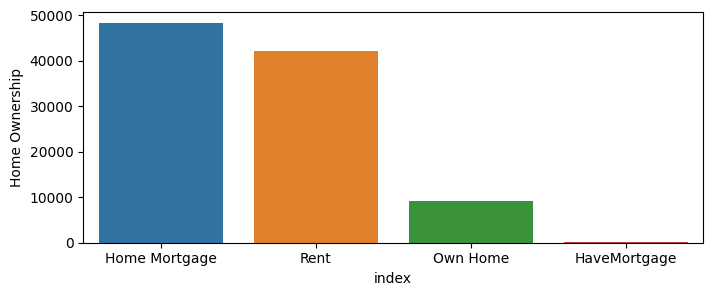

In [10]:
plt.subplots(figsize = (8,3))
bar_y = pd.DataFrame(df['Home Ownership'].value_counts()).reset_index()
sns.barplot(data = bar_y, x = 'index', y = 'Home Ownership')
plt.show()

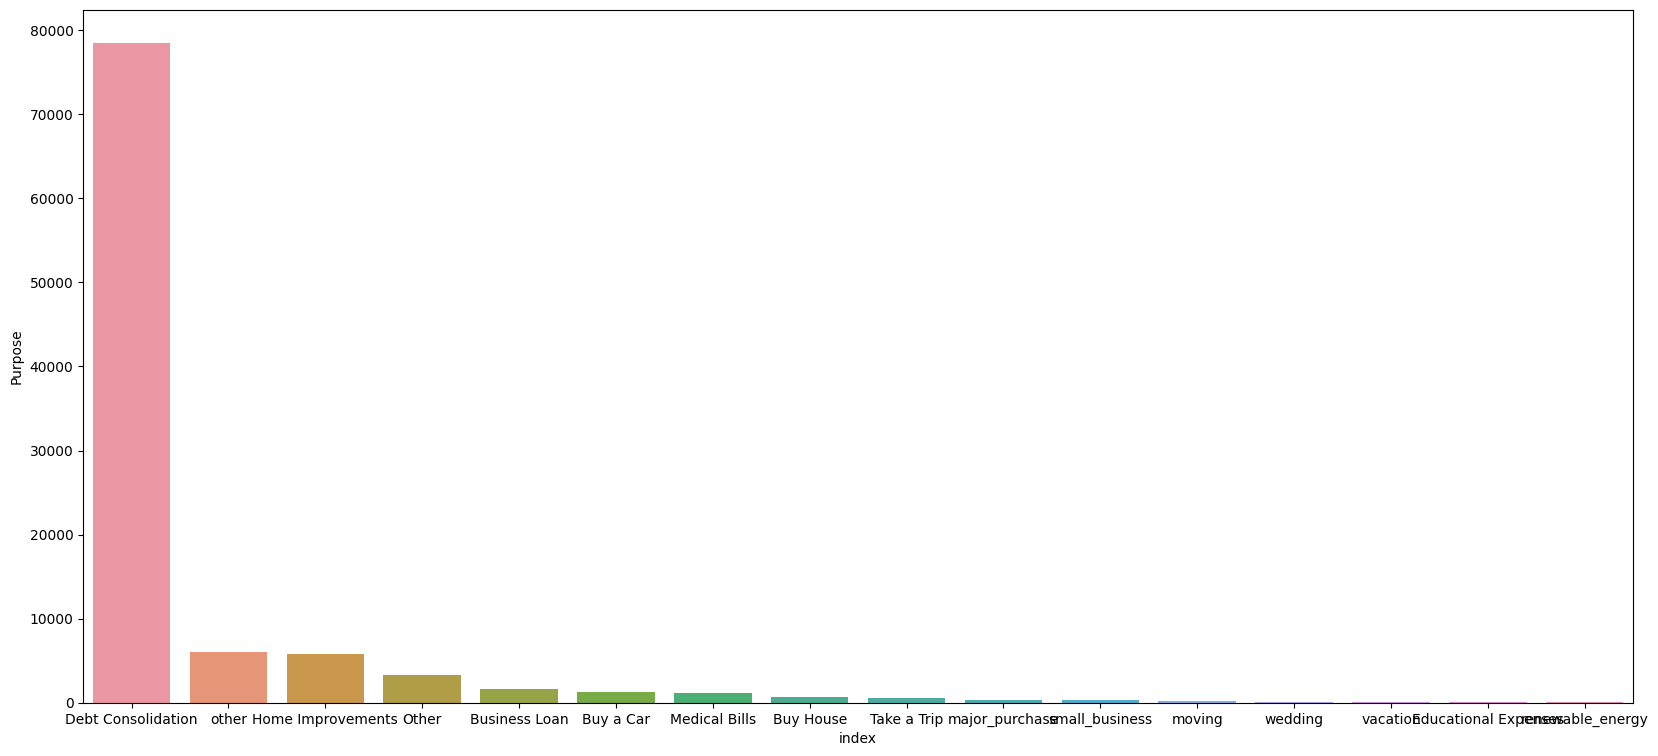

In [11]:
plt.subplots(figsize = (20,9))
bar_y = pd.DataFrame(df['Purpose'].value_counts()).reset_index()
sns.barplot(data = bar_y, x = 'index', y = 'Purpose')
plt.show()

In [12]:
df['y'] = df['Loan Status'].replace(
                                    {'Fully Paid' : 0,
                                    'Charged Off': 1}
                                    )

In [13]:
df['ordinal_years_job'] = df['Years in current job'].replace(
                                                            {
                                                            '10+ years' : 10,
                                                            '2 years': 2,
                                                            '3 years': 3,
                                                            '< 1 year': 0,
                                                            '5 years': 5,
                                                            '1 year': 1,
                                                            '4 years': 4,
                                                            '6 years': 6,
                                                            '7 years': 7,
                                                            '8 years': 8,
                                                            '9 years': 9
                                                            }
                                                            )

In [14]:
df.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

In [15]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,y,ordinal_years_job
0,Fully Paid,"445,412.00",Short Term,709.00,"1,167,493.00",8 years,Home Mortgage,Home Improvements,"5,214.74",17.20,NaN,6.00,1.00,"228,190.00","416,746.00",1.00,0.00,0,8.00
1,Fully Paid,"262,328.00",Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,"33,295.98",21.10,8.00,35.00,0.00,"229,976.00","850,784.00",0.00,0.00,0,10.00
2,Fully Paid,"99,999,999.00",Short Term,741.00,"2,231,892.00",8 years,Own Home,Debt Consolidation,"29,200.53",14.90,29.00,18.00,1.00,"297,996.00","750,090.00",0.00,0.00,0,8.00
3,Fully Paid,"347,666.00",Long Term,721.00,"806,949.00",3 years,Own Home,Debt Consolidation,"8,741.90",12.00,NaN,9.00,0.00,"256,329.00","386,958.00",0.00,0.00,0,3.00
4,Fully Paid,"176,220.00",Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,"20,639.70",6.10,NaN,15.00,0.00,"253,460.00","427,174.00",0.00,0.00,0,5.00


In [36]:
X = df.drop(['Years in current job','Loan Status'], axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

X_numeric_train = X_train.select_dtypes(exclude = 'object')
X_categoric_train = X_train.select_dtypes('object')

### Impute Variables

In [37]:
imputer = KNNImputer(n_neighbors=20)
X_numeric_train_imputed = imputer.fit_transform(X_numeric_train)

In [38]:
X_numeric_train_imputed = pd.DataFrame(data = X_numeric_train_imputed, columns = X_numeric_train.columns, index = X_numeric_train.index)
X_numeric_train_imputed

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,y,ordinal_years_job
75220,"118,866.00",703.00,"950,570.00","12,832.79",12.20,28.00,7.00,0.00,"187,644.00","268,554.00",0.00,0.00,0.00,0.00
48955,"64,724.00",724.00,"447,241.00","1,379.02",13.70,71.00,5.00,0.00,"15,694.00","108,152.00",0.00,0.00,0.00,0.00
44966,"531,212.00",647.00,"1,177,468.00","11,774.68",13.70,7.00,12.00,1.00,"287,869.00","1,038,356.00",0.00,0.00,1.00,7.00
13568,"359,282.00","1,013.95","1,450,910.30","24,944.72",35.60,35.65,20.00,0.00,"458,793.00","1,235,410.00",0.00,0.00,1.00,10.00
92727,"120,890.00",658.00,"352,393.00","5,344.70",9.50,39.15,6.00,0.00,"192,641.00","284,152.00",0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,"276,254.00",729.00,"2,384,937.00","36,370.37",20.20,13.00,18.00,0.00,"372,951.00","901,538.00",0.00,0.00,0.00,10.00
54886,"136,510.00",716.00,"770,279.00","6,611.62",6.90,41.20,6.00,0.00,"91,523.00","145,794.00",0.00,0.00,1.00,1.00
76820,"267,872.00","1,037.50","1,166,790.00","15,797.93",18.50,35.35,13.00,0.00,"141,322.00","361,240.00",0.00,0.00,1.00,3.00
860,"216,942.00",735.00,"599,545.00","11,691.27",14.00,34.35,12.00,1.00,"159,296.00","312,620.00",1.00,0.00,1.00,10.00


In [39]:
X_categoric_train_imputed = X_categoric_train.fillna('Non Categorie')

### Scale numeric variables

In [40]:
qt = QuantileTransformer(n_quantiles = 25, random_state = 0)
X_numeric_train_imputed_transform = qt.fit_transform(X_numeric_train_imputed)

In [41]:
X_numeric_train_imputed_transform = pd.DataFrame(data = X_numeric_train_imputed_transform, columns = X_numeric_train_imputed.columns, index = X_numeric_train_imputed.index)
X_numeric_train_imputed_transform.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,y,ordinal_years_job
75220,0.12,0.19,0.30,0.36,0.18,0.26,0.19,0.00,0.45,0.24,0.00,0.00,0.00,0.00
48955,0.04,0.44,0.03,0.02,0.26,0.96,0.08,0.00,0.03,0.05,0.00,0.00,0.00,0.00
44966,0.76,0.03,0.48,0.32,0.26,0.04,0.65,0.92,0.65,0.85,0.00,0.00,1.00,0.58
13568,0.58,0.83,0.67,0.77,0.96,0.55,0.94,0.00,0.83,0.90,0.00,0.00,1.00,1.00
92727,0.12,0.04,0.02,0.09,0.07,0.70,0.12,0.00,0.46,0.26,0.00,0.00,0.00,0.00


#### Imputación Variables Categoricas


In [63]:
def woe_categorical_encoding(X,target = 'y', labels = None):
    X_ = X.copy(deep = True)
    lista_labels = []
    if labels:
        for i in X_.columns:
            if i != target:
                for j in labels:
                    if j[0] == i:
                        X_[i] = X_[i].map(j[1])
                        
        return X_.drop([target],axis = 1)
    
    
    for i in X_.columns:
        if i != target:
            
            #Proporción de positivos
            prob_df = X_.groupby([i])[target].mean()
            prob_df = pd.DataFrame(prob_df)
            
            # Proporción de negativos
            prob_df['Negativo'] = 1 - prob_df[target]
            
            # Imputar valores en cero.
            prob_df.loc[prob_df[target] == 0, target] = 0.00001
            prob_df.loc[prob_df['Negativo'] == 0, 'Negativo'] = 0.00001
            
            # Calcular el WoE
            prob_df['WoE'] = np.log(prob_df[target] / prob_df['Negativo'])
            ordered_labels = prob_df['WoE'].to_dict()
            
            X_[i] = X_[i].map(ordered_labels)
            
            lista_labels.append([i,ordered_labels])
            
            
    return X_.drop([target],axis = 1), lista_labels
            

In [43]:
X_categoric_train_imputed = pd.concat([X_categoric_train_imputed,y_train], axis = 1)

In [44]:
X_categoric_train_imputed, ordered_labels_woe = woe_categorical_encoding(X = X_categoric_train_imputed)
ordered_labels_woe

[['Term',
  {'Long Term': -0.8403769740630983, 'Short Term': -1.4026769355266255}],
 ['Home Ownership',
  {'HaveMortgage': -1.8142323250801138,
   'Home Mortgage': -1.3565347216157273,
   'Own Home': -1.235695194417128,
   'Rent': -1.088484017248196}],
 ['Purpose',
  {'Business Loan': -0.8335990160290417,
   'Buy House': -1.4851984351788046,
   'Buy a Car': -1.65881579334099,
   'Debt Consolidation': -1.218521331596063,
   'Educational Expenses': -1.4508328822574617,
   'Home Improvements': -1.3919176186742528,
   'Medical Bills': -1.0986122886681098,
   'Other': -1.494440467100224,
   'Take a Trip': -1.3146383722134554,
   'major_purchase': -1.26649316130727,
   'moving': -0.7552789616669513,
   'other': -1.177011160355044,
   'renewable_energy': -0.22314355131420985,
   'small_business': -0.2569104137850271,
   'vacation': -0.8415671856782185,
   'wedding': -1.466337068793427}]]

In [26]:
X_train_def = pd.concat([X_categoric_train_imputed,X_numeric_train_imputed_transform], axis = 1)
X_train_def.drop(['y'],axis = 1, inplace = True)

### Modelación

In [27]:
clf = xgb.XGBClassifier(
                        objective= 'binary:logistic',
                        eval_metric= 'logloss',
                        n_estimators = 300,
                        max_depth = 5,
                        learning_rate = 0.05
                        )

In [28]:
clf.fit(X_train_def,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

### Evaluación

In [115]:
def plot_roc_curve(test_y, pred_y):
    """Trazar la curva ROC a partir de las respuestas correctas y las predicciones

    Args:
        test_y (ndarray of shape (n_samples,)): y
        pred_y (ndarray of shape (n_samples,)): Valor previsto para y
    """
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="orange", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellene el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

In [137]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train_def, y_train)
        y_pred = clf.predict(X_test_def)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test_def)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test_def)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

In [98]:
X_numeric_test = X_test.select_dtypes(exclude = 'object')
X_categoric_test = X_test.select_dtypes('object')

In [99]:
imputer = KNNImputer(n_neighbors=20)
X_numeric_test_imputed = imputer.fit_transform(X_numeric_test)
X_numeric_test_imputed = pd.DataFrame(data = X_numeric_test_imputed, columns = X_numeric_test.columns, index = X_numeric_test.index)
X_numeric_test_imputed.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,y,ordinal_years_job
75721,"322,014.00",717.00,"1,038,255.00","21,630.36",14.60,45.00,11.00,0.00,"135,679.00","382,228.00",0.00,0.00,0.00,7.00
80184,"263,758.00","7,180.00","1,062,537.00","17,885.84",11.20,36.25,9.00,1.00,"186,029.00","331,892.00",1.00,0.00,1.00,4.00
19864,"450,384.00",624.00,"1,361,388.00","33,921.27",10.40,34.05,8.00,0.00,"387,676.00","515,988.00",0.00,0.00,1.00,5.00
76699,"176,726.00",723.05,"1,017,868.95","10,931.65",16.50,28.00,11.00,0.00,"161,861.00","635,294.00",0.00,0.00,0.00,3.00
92991,"764,610.00",685.00,"2,264,040.00","9,358.07",7.00,28.70,6.00,0.00,"86,754.00","225,214.00",0.00,0.00,0.00,1.00


In [100]:
X_categoric_test_imputed = X_categoric_test.fillna('Non Categorie')

In [101]:
qt = QuantileTransformer(n_quantiles = 25, random_state = 0)
X_numeric_test_imputed_transform = qt.fit_transform(X_numeric_test_imputed)
X_numeric_test_imputed_transform = pd.DataFrame(data = X_numeric_test_imputed_transform, columns = X_numeric_test_imputed.columns, index = X_numeric_test_imputed.index)
X_numeric_test_imputed_transform.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,y,ordinal_years_job
75721,0.53,0.33,0.38,0.69,0.32,0.82,0.56,0.00,0.32,0.40,0.00,0.00,0.00,0.56
80184,0.43,0.98,0.40,0.57,0.13,0.54,0.38,0.92,0.45,0.33,0.94,0.00,1.00,0.35
19864,0.71,0.02,0.62,0.90,0.10,0.44,0.27,0.00,0.77,0.55,0.00,0.00,1.00,0.44
76699,0.25,0.42,0.36,0.28,0.47,0.25,0.56,0.00,0.40,0.66,0.00,0.00,0.00,0.27
92991,0.87,0.10,0.91,0.22,0.03,0.26,0.12,0.00,0.18,0.18,0.00,0.00,0.00,0.10


In [102]:
X_categoric_test_imputed = pd.concat([X_categoric_test_imputed,y_test], axis = 1)
X_categoric_test_imputed = woe_categorical_encoding(X_categoric_test_imputed, target = 'y', labels = ordered_labels_woe)
X_test_def = pd.concat([X_categoric_test_imputed,X_numeric_test_imputed_transform], axis = 1)
X_test_def.drop(['y'],axis = 1, inplace = True)
X_test_def.head()

,Term,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,ordinal_years_job
75721,-1.40,-1.09,-1.22,0.53,0.33,0.38,0.69,0.32,0.82,0.56,0.00,0.32,0.40,0.00,0.00,0.56
80184,-1.40,-1.36,-1.22,0.43,0.98,0.40,0.57,0.13,0.54,0.38,0.92,0.45,0.33,0.94,0.00,0.35
19864,-0.84,-1.09,-1.22,0.71,0.02,0.62,0.90,0.10,0.44,0.27,0.00,0.77,0.55,0.00,0.00,0.44
76699,-1.40,-1.09,-1.22,0.25,0.42,0.36,0.28,0.47,0.25,0.56,0.00,0.40,0.66,0.00,0.00,0.27
92991,-1.40,-1.36,-0.26,0.87,0.10,0.91,0.22,0.03,0.26,0.12,0.00,0.18,0.18,0.00,0.00,0.10


In [116]:
y_predict = clf.predict(X_test_def)

In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15469
           1       0.95      0.22      0.36      4531

    accuracy                           0.82     20000
   macro avg       0.88      0.61      0.63     20000
weighted avg       0.85      0.82      0.77     20000



In [118]:
cm = CM(y_test, y_predict)

Text(0.5, 23.52222222222222, 'Predicciones')

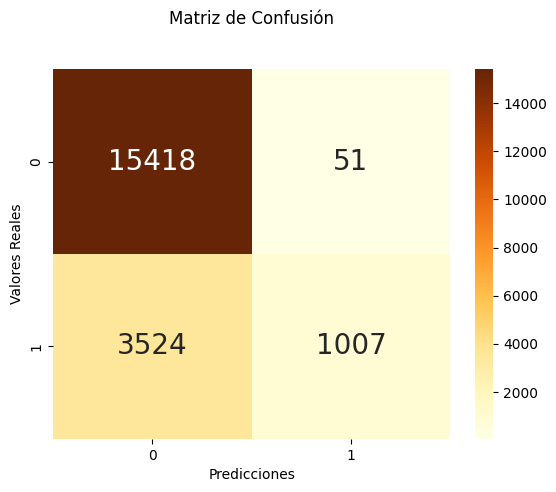

In [119]:
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [122]:
y_predict_prob = clf.predict_proba(X_test_def)[:, 1]

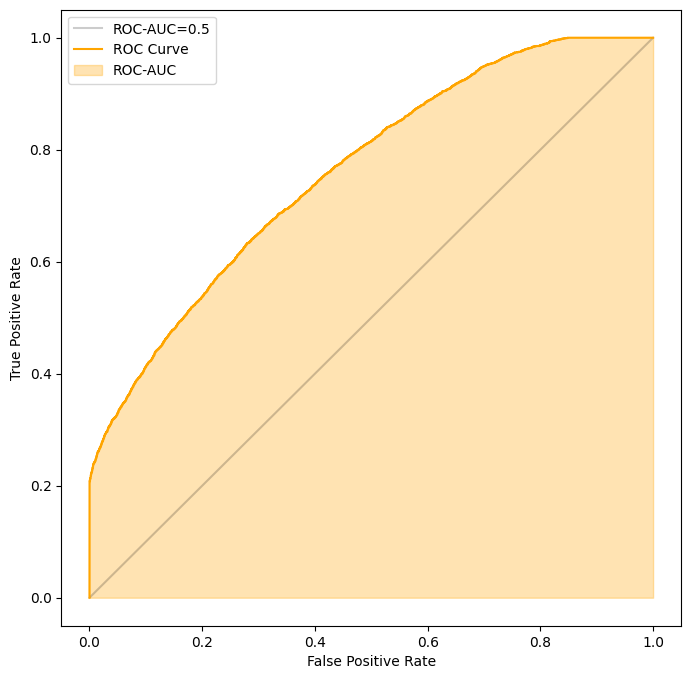

In [123]:
plot_roc_curve(y_test, y_predict_prob)

In [125]:
roc_auc_score(y_test, y_predict_prob)

0.7610971225169385

Logistic:
	Brier: 0.159
	Precision: 0.689
	Recall: 0.122
	F1: 0.208

XGBoost:
	Brier: 0.134
	Precision: 0.952
	Recall: 0.222
	F1: 0.360

XGBoost + Isotonic:
	Brier: 0.134
	Precision: 0.969
	Recall: 0.218
	F1: 0.355

XGBoost + Sigmoid:
	Brier: 0.135
	Precision: 0.838
	Recall: 0.257
	F1: 0.394



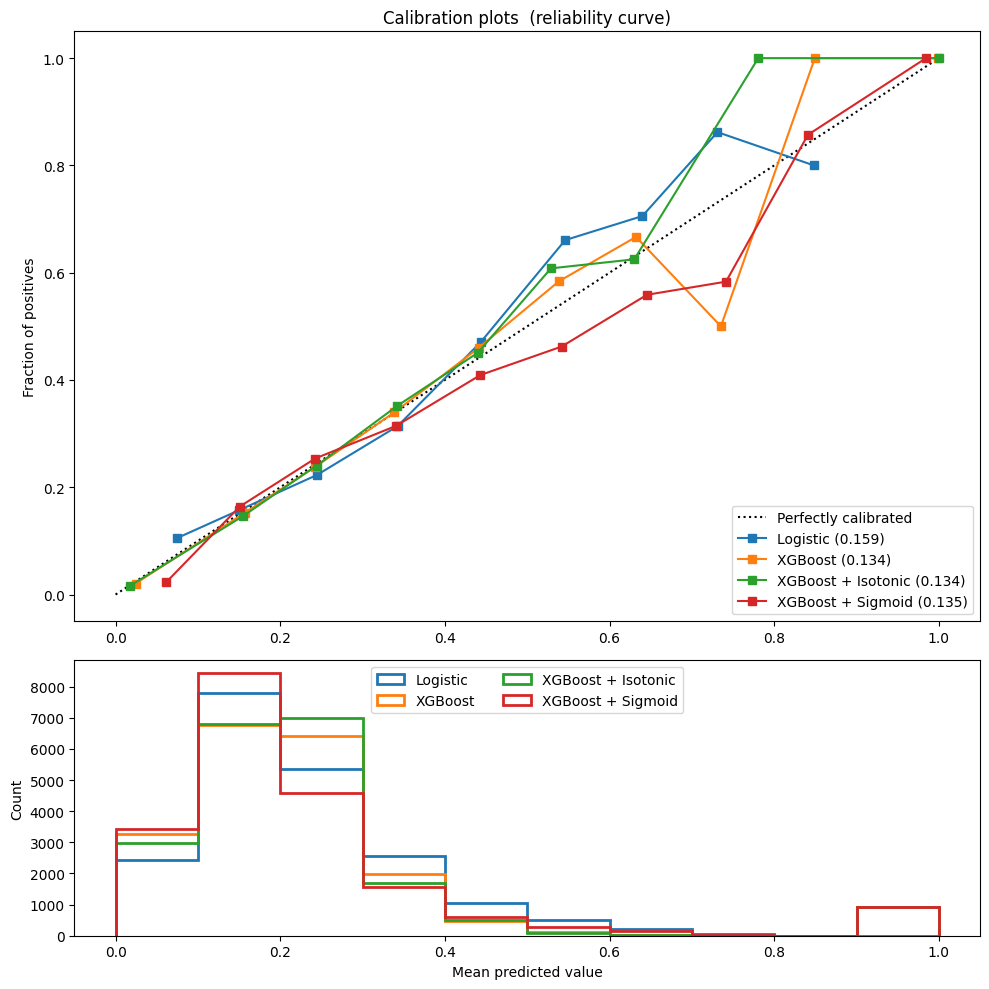

In [140]:
plot_calibration_curve(clf,'XGBoost',1)

### Cost-Sensitive Learning

In [126]:
class_weights = {0: 1, 1: 4}

In [127]:
clf_2 = xgb.XGBClassifier( 
    objective= 'binary:logistic',
    eval_metric = 'logloss',
    n_estimators = 300,
    max_depth = 5,
    learning_rate = 0.05,
    scale_pos_weight = class_weights[1] / class_weights[0]  # Usamos los pesos definidos
                         )

In [128]:
clf_2.fit(X_train_def,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [129]:
y_predict = clf_2.predict(X_test_def)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72     15469
           1       0.35      0.74      0.48      4531

    accuracy                           0.63     20000
   macro avg       0.62      0.67      0.60     20000
weighted avg       0.77      0.63      0.66     20000



Text(0.5, 23.52222222222222, 'Predicciones')

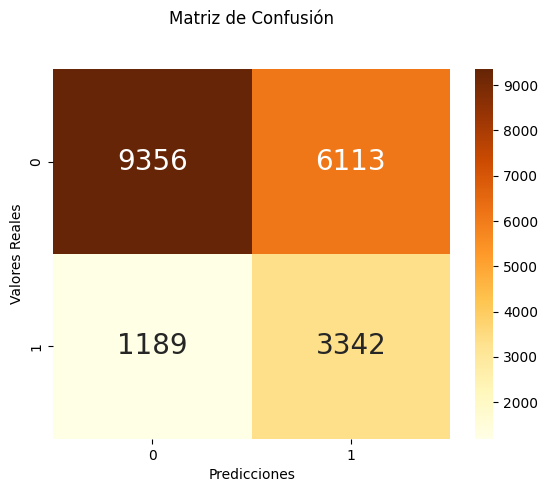

In [113]:
cm = CM(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

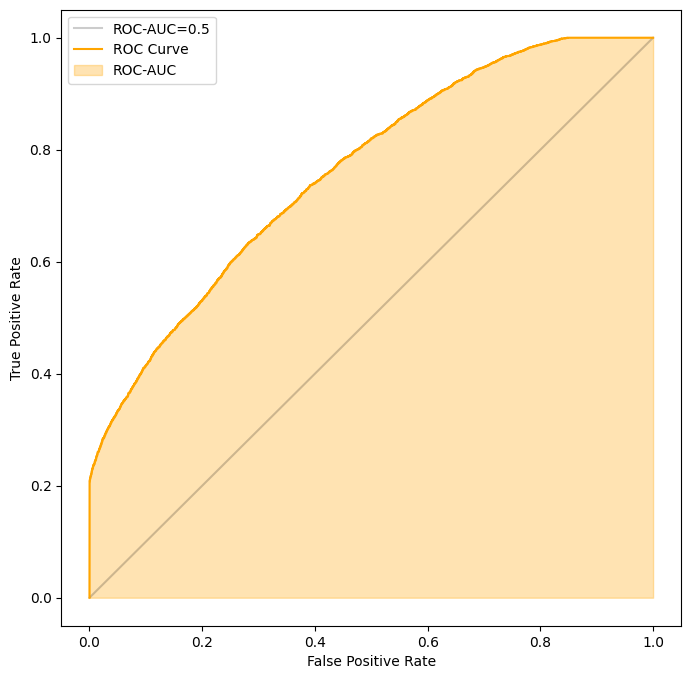

In [130]:
y_predict_prob = clf_2.predict_proba(X_test_def)[:, 1]
plot_roc_curve(y_test, y_predict_prob)

In [131]:
roc_auc_score(y_test, y_predict_prob)

0.7612155130916677

Logistic:
	Brier: 0.159
	Precision: 0.689
	Recall: 0.122
	F1: 0.208

XGBoost:
	Brier: 0.204
	Precision: 0.353
	Recall: 0.738
	F1: 0.478

XGBoost + Isotonic:
	Brier: 0.134
	Precision: 0.967
	Recall: 0.216
	F1: 0.353

XGBoost + Sigmoid:
	Brier: 0.136
	Precision: 0.826
	Recall: 0.260
	F1: 0.396



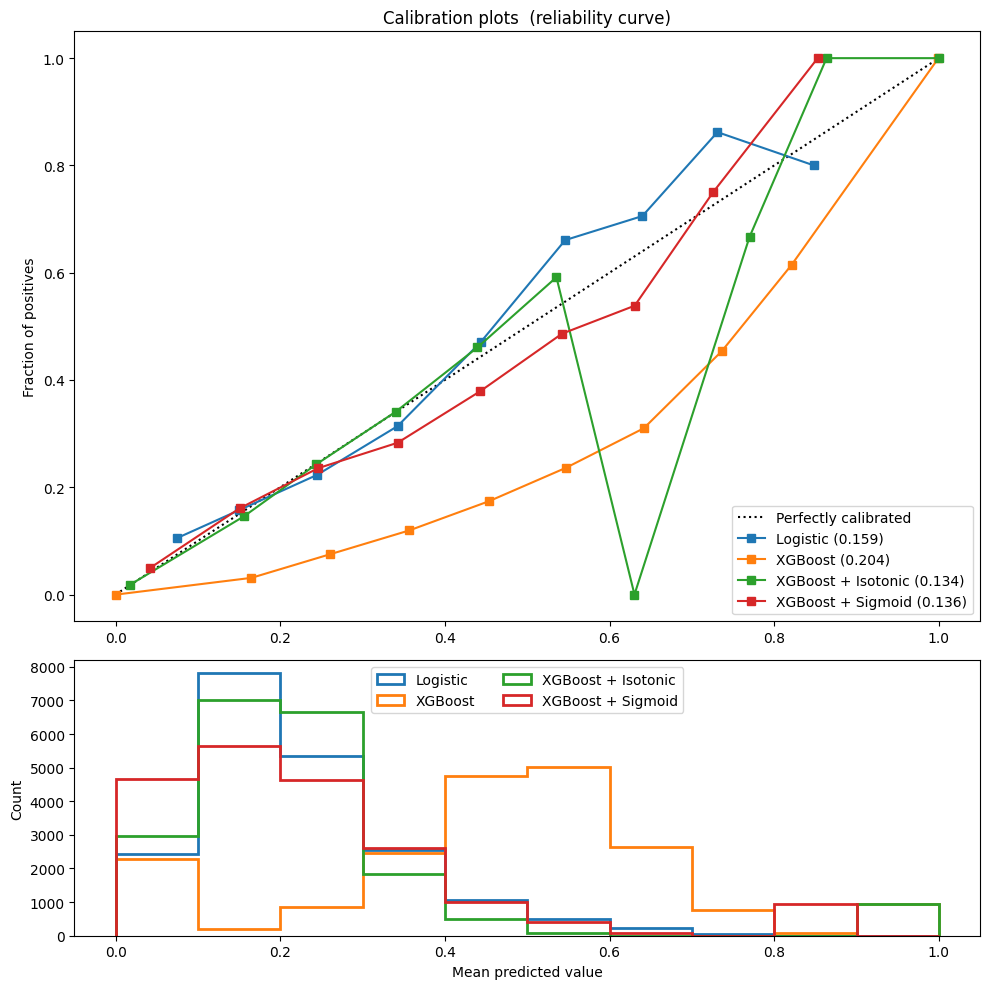

In [142]:
plot_calibration_curve(clf_2,'XGBoost',1)